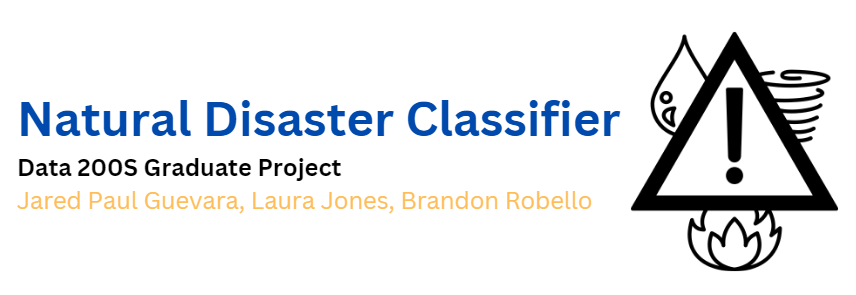


# Modeling - Task A: `socal-fire` vs. `midwest-flooding`


The model we'll be using to complete Task A and B are support vector machines (SVMs), specifically `sklearn`'s `LinearSVC` model, which is suited for both binary (Task A) and multi-class classification (Task B).


**Importing `LinearSVC` from `sklearn`:**


In [3]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [6]:
task_A_df = pd.read_csv('../data/task-data/task-A.csv')
task_A_df.head()

,image_matrix,disaster,label,height,width,aspect_ratio,total_pixels,avg_pixel_int,lbp_var,lbp_mean,...,gabor_3_var,gabor_4_var,gabor_6_var,gabor_1_var,gabor_9_var,gabor_5_var,gabor_0_var,area of red pixels at 150 threshold,area of green pixels at 150 threshold,area of blue pixels at 150 threshold
0,[[[ 50 72 48]\n [ 49 71 47]\n [ 49 71 ...,socal-fire,0,144,195,1.354167,28080,122.675415,4.963108,4.652137,...,0.000144,0.000004,3.905644e-07,0.006954,0.007080,0.000003,0.000109,0.235399,0.310043,0.300214
1,[[[ 66 84 80]\n [ 79 99 94]\n [103 127 1...,socal-fire,0,48,51,1.062500,2448,82.526416,5.270881,4.534314,...,0.000121,0.000005,4.556804e-07,0.001811,0.001832,0.000005,0.000094,0.010621,0.017157,0.075163
2,[[[ 74 107 95]\n [ 74 106 95]\n [ 70 100 ...,socal-fire,0,104,140,1.346154,14560,110.527908,4.821204,4.668475,...,0.000152,0.000002,2.496491e-07,0.004618,0.004575,0.000002,0.000098,0.098420,0.171429,0.151580
3,[[[100 114 111]\n [102 115 112]\n [105 117 1...,socal-fire,0,128,138,1.078125,17664,105.995131,4.830619,4.610054,...,0.000125,0.000003,2.737959e-07,0.003269,0.003240,0.000003,0.000089,0.067652,0.125170,0.125566
4,[[[ 67 100 90]\n [ 65 98 88]\n [ 60 92 ...,socal-fire,0,65,96,1.476923,6240,93.071047,5.323417,4.728526,...,0.000151,0.000003,2.783287e-07,0.002259,0.002111,0.000003,0.000097,0.027404,0.054487,0.114263


In [7]:
X = task_A_df.iloc[:, 2:]
y = task_A_df['disaster'].replace({'midwest-flooding' : 0,
                                 'socal-fire' : 1})
assert(len(X) == 8380+7004)
assert(len(y) == 8380+7004)
print(X.shape, y.shape)

(15384, 20) (15384,)


# DO PCA HERE


In [ ]:
# LinearSVC Feature Selection (runtime: ~8sec)
def svc_feature_selection(features):
  feature_scores = []

  for combo in features:
    X_train, X_val, y_train, y_val = train_test_split(X[combo], y, test_size=0.2, random_state=42)
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC())])
    feature_scores.append((combo, pipe.fit(X_train, y_train).score(X_train, y_train)))

  return feature_scores

feature_combinations = [['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int'],
                        ['lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var'],
                        ['area of red pixels at 150 threshold',	'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold'],
                        ['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int', 'lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var'],
                        ['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int', 'area of red pixels at 150 threshold',	'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold'],
                        ['lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var', 'area of red pixels at 150 threshold',	'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold'],
                        ['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int', 'lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var', 'area of red pixels at 150 threshold', 'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold']]

print(f'Best training score among feature combinations: {max(svc_feature_selection(feature_combinations))[1]:.3f}')

svc_best_params = max(svc_feature_selection(feature_combinations))[0]
print(f'Best parameters for LinearSVC: {svc_best_params}')

Best training score among feature combinations: 0.982
Best parameters for LinearSVC: ['lbp_var', 'lbp_mean', 'sobel_mean', 'gabor_7_var', 'gabor_3_var', 'area of red pixels at 150 threshold', 'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold']


# PCA ABOVE TO FILTER FEATURES


In [ ]:
# LinearSVC Grid Search (runtime: ~1min 20sec)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', LinearSVC())])

param_grid = {'svc__C' : [0.01, 0.1, 1, 10, 100],
              'svc__max_iter' : [500, 1000, 2000, 3000],
              'svc__penalty' : ['l1', 'l2']}

best_X = X[svc_best_params]

grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(best_X, y)

print(f'Best score: {grid_search.best_score_:.3f}')
print(f'Best hyperparameters for LinearSVC model: {grid_search.best_params_}')

Best score: 0.982
Best hyperparameters for LinearSVC model: {'svc__C': 10, 'svc__max_iter': 500, 'svc__penalty': 'l2'}


The only hyperparameters we'll have to tune are C, or the regularization parameter, and the max iterations. The default values for each are 1.0 and 1000, will be tuned to 10 and 500.


In [ ]:
optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(C=10, max_iter=1000))]) # default penalty is 'l2'

X_train, X_val, y_train, y_val = train_test_split(best_X, y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
svc_train_preds = optimal_pipe.predict(X_train)
svc_train_score = optimal_pipe.score(X_train, y_train)
svc_val_preds = optimal_pipe.predict(X_val)
svc_val_score = optimal_pipe.score(X_val, y_val)
svc_cv_score = cross_val_score(optimal_pipe, best_X, y, cv=10)
print(f'Initial training score: {svc_train_score}')
print(f'Initial validation score: {svc_val_score}')
print(f'Average cross-validation score across 10 folds: {svc_cv_score.mean()}')

Initial training score: 0.98196148533355
Initial validation score: 0.9814754631134222
Average cross-validation score across 10 folds: 0.9818639516481324


              precision    recall  f1-score   support

           0      0.984     0.975     0.980      1404
           1      0.979     0.987     0.983      1673

    accuracy                          0.981      3077
   macro avg      0.982     0.981     0.981      3077
weighted avg      0.981     0.981     0.981      3077



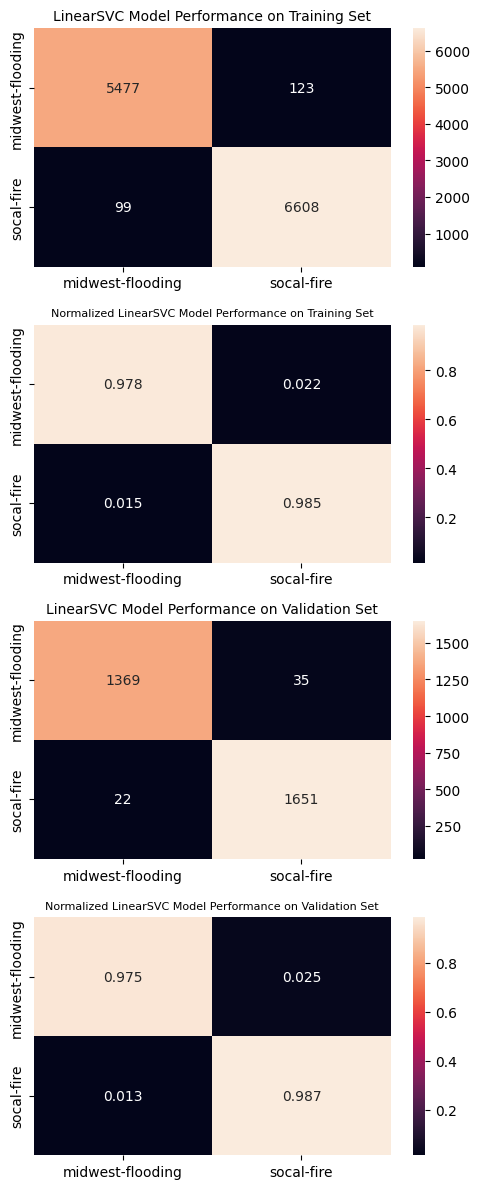

In [ ]:
from sklearn.metrics import confusion_matrix

print(classification_report(y_val, svc_val_preds, digits=3))

plt.subplots(figsize=(5,12))

plt.subplot(4, 1, 1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, svc_train_preds), index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.0f', annot=True)
plt.title('LinearSVC Model Performance on Training Set', fontsize=10)

plt.subplot(4, 1, 2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, svc_train_preds, normalize='true'),
                         index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.3f', annot=True)
plt.title('Normalized LinearSVC Model Performance on Training Set', fontsize=8)

plt.subplot(4, 1, 3)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, svc_val_preds), index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.0f', annot=True)
plt.title('LinearSVC Model Performance on Validation Set', fontsize=10)

plt.subplot(4, 1, 4)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, svc_val_preds, normalize='true'),
                         index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.3f', annot=True)
plt.title('Normalized LinearSVC Model Performance on Validation Set', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# RandomForestClassifier Feature Selection (runtime: ~45sec)
from sklearn.ensemble import RandomForestClassifier

def rfc_feature_selection(features):
  feature_scores = []

  for combo in features:
    X_train, X_val, y_train, y_val = train_test_split(X[combo], y, test_size=0.2, random_state=42)
    pipe = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier(random_state=42))])
    feature_scores.append((combo, pipe.fit(X_train, y_train).score(X_train, y_train)))

  return feature_scores

feature_combinations = [['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int'],
                        ['lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var'],
                        ['area of red pixels at 150 threshold',	'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold'],
                        ['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int', 'lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var'],
                        ['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int', 'area of red pixels at 150 threshold',	'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold'],
                        ['lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var', 'area of red pixels at 150 threshold',	'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold'],
                        ['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int', 'lbp_var',	'lbp_mean',	'sobel_mean', 'gabor_7_var', 'gabor_3_var', 'area of red pixels at 150 threshold', 'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold']]

print(f'Best training score among feature combinations: {max(rfc_feature_selection(feature_combinations))[1]:.3f}')

rfc_best_params = max(rfc_feature_selection(feature_combinations))[0]
print(f'Best parameters for RandomForestClassifier: {rfc_best_params}')

Best training score among feature combinations: 1.000
Best parameters for RandomForestClassifier: ['lbp_var', 'lbp_mean', 'sobel_mean', 'gabor_7_var', 'gabor_3_var', 'area of red pixels at 150 threshold', 'area of green pixels at 150 threshold', 'area of blue pixels at 150 threshold']


In [ ]:
# RandomForestClassifier Grid Search (runtime: ~38m)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()),
                 ('rfc', RandomForestClassifier(random_state=42))])

param_grid = {'rfc__n_estimators' : [10, 100],
              'rfc__max_features' : ['sqrt', 'log2', 0.33],
              'rfc__max_depth' : [1, 2, 5, 10]}

best_X = X[rfc_best_params]

grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(best_X, y)

print(f'Best score: {grid_search.best_score_:.3f}')
print(f'Best hyperparameters for RandomForestClassifier model: {grid_search.best_params_}')

Best score: 0.985
Best hyperparameters for RandomForestClassifier model: {'rfc__max_depth': 10, 'rfc__max_features': 'sqrt', 'rfc__n_estimators': 10}


In [ ]:
optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('rfc', RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=10, random_state=42))])

X_train, X_val, y_train, y_val = train_test_split(best_X, y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
rfc_train_preds = optimal_pipe.predict(X_train)
rfc_train_score = optimal_pipe.score(X_train, y_train)
rfc_val_preds = optimal_pipe.predict(X_val)
rfc_val_score = optimal_pipe.score(X_val, y_val)
rfc_cv_score = cross_val_score(optimal_pipe, best_X, y, cv=10)
print(f'Initial training score: {rfc_train_score}')
print(f'Initial validation score: {rfc_val_score}')
print(f'Average cross-validation score across 10 folds: {rfc_cv_score.mean()}')

Initial training score: 0.994799707483546
Initial validation score: 0.9840753981150471
Average cross-validation score across 10 folds: 0.9851139129913113


              precision    recall  f1-score   support

           0      0.988     0.977     0.982      1404
           1      0.981     0.990     0.985      1673

    accuracy                          0.984      3077
   macro avg      0.984     0.984     0.984      3077
weighted avg      0.984     0.984     0.984      3077



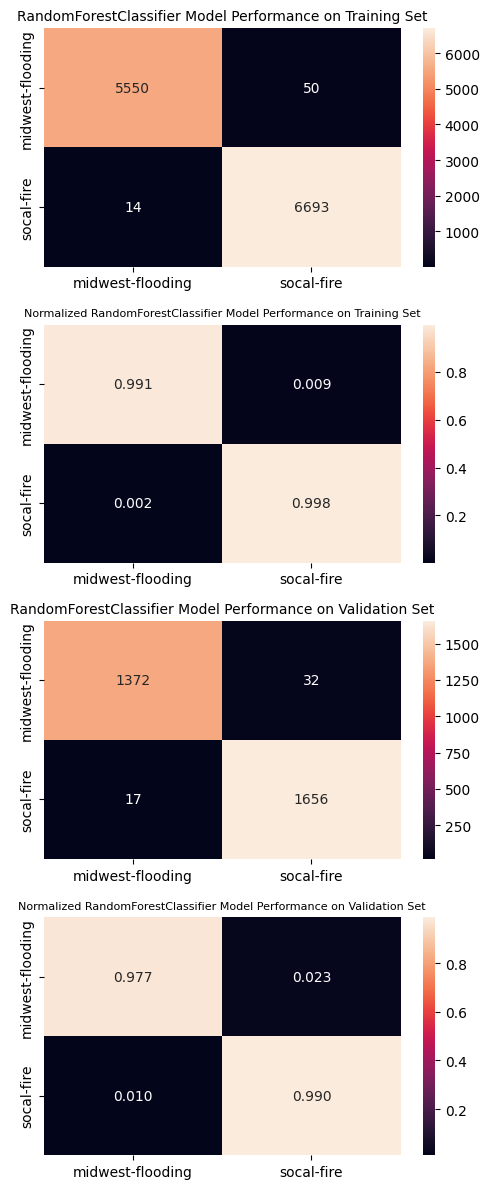

In [ ]:
plt.subplots(figsize=(5,12))

print(classification_report(y_val, rfc_val_preds, digits=3))

plt.subplot(4, 1, 1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, rfc_train_preds), index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.0f', annot=True)
plt.title('RandomForestClassifier Model Performance on Training Set', fontsize=10)

plt.subplot(4, 1, 2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, rfc_train_preds, normalize='true'),
                         index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.3f', annot=True)
plt.title('Normalized RandomForestClassifier Model Performance on Training Set', fontsize=8)

plt.subplot(4, 1, 3)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, rfc_val_preds), index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.0f', annot=True)
plt.title('RandomForestClassifier Model Performance on Validation Set', fontsize=10)

plt.subplot(4, 1, 4)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, rfc_val_preds, normalize='true'),
                         index=['midwest-flooding', 'socal-fire'], columns=['midwest-flooding', 'socal-fire']), fmt='.3f', annot=True)
plt.title('Normalized RandomForestClassifier Model Performance on Validation Set', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
print(f'LinearSVC vs. RandomForestClassifier Mean Cross-Validation Scores: {svc_cv_score.mean()} vs. {rfc_cv_score.mean()}')
print(f'LinearSVC vs. RandomForestClassifier Training Scores: {svc_train_score} vs. {rfc_train_score}')
print(f'LinearSVC vs. RandomForestClassifier Validation Scores: {svc_val_score} vs. {rfc_val_score}')

LinearSVC vs. RandomForestClassifier Mean Cross-Validation Scores: 0.9817337858927528 vs. 0.9851139129913113
LinearSVC vs. RandomForestClassifier Training Scores: 0.9822052490452587 vs. 0.994799707483546
LinearSVC vs. RandomForestClassifier Validation Scores: 0.9805004874878128 vs. 0.9840753981150471
